# I. OOP

1. (6б). Створіть клас Building, додайте три атрибути, один з яких має значення за замовчуванням та два методи на свій розсуд.

In [17]:
class Building:
    def __init__(self, squere, colors, floors=1):
      self.squere = squere
      self.colors = colors if isinstance(colors, list) else [colors]
      self.floors = floors

    def extendBulding(self, floors=1):
        if floors > 3:
            raise ValueError("The building can't be extended with more than 3 floors")
        self.square = (self.square / self.floors) * (self.floors + floors)
        self.floors += floors

    def repaint(self, color):
        if color not in self.colors:
            self.colors.append(color)

2. (2б). Створіть два обʼєкти цього класу, де один з обʼєктів створюється із дефолтним значенням атрибуту. На одному обʼєкті отримайте значення його атрибуту, а на іншому викличте один з його методів.

In [25]:
office = Building(300, "white", 4)
house = Building(100, ["brown", "yellow"])

print(office.colors)

house.extendBulding(3)
print(house.floors)

white
4


3. (5б). Створіть клас, де атрибути мають різні рівні доступу. Спробуйте отримати їхні значення та опишіть результати.

In [35]:
class Employee:
    def __init__(self, name, salary, bonus=0):
        self.name = name
        self._salary = salary
        self.__bonus = bonus

    def get_bonus(self):
      return self.__bonus

    def set_bonus(self, bonus):
      self.__bonus = bonus

employee = Employee("Harry Jonson", 15000, 1000)

print(employee.name)
print(employee._salary)
# print(employee.__bonus)
print(employee.get_bonus())


Harry Jonson
15000
1000


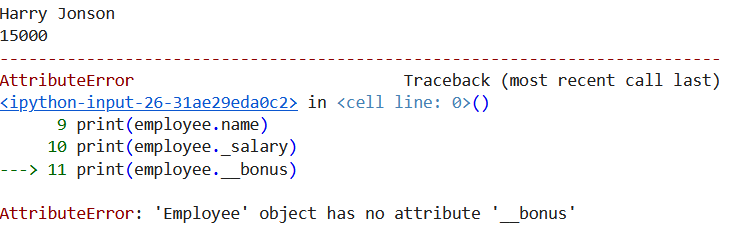

При виклику public та protected змфних вони без проблем виводяться на екран, але краще явно так не робити з змінами protected, бо нато вони такими створюються. А при виклику private змінної ми отримуємо помилку, вона недоступна напряму, можна лише через гетери та сетери отримувати та змінювати таку змінну.

4. (7б). Як ви розумієте термін self? Для чого використовується метод __init __?

self це такий параметр, який посилається на поточний об'єкт класу, а __init __ це конструктор класу, який ініціалізує атрибути об'єкта.

5. (9б). Створіть клас 3D-фігура без атрибутів, з методом get_volume для отримання об'єму фігури, що повертає 0 та __add __, який приймає self та other в якості аргументів, а повертає суму об'ємів 3d-фігур self та other.

In [39]:
class Shape3D:
    def get_volume(self):
        return 0

    def __add__(self, other):
        if not isinstance(other, Shape3D):
            raise ValueError("Only objects Shape3D can be added")
        return self.get_volume() + other.get_volume()


6. (11б). Створіть 2 дочірніх класи від 3d-фігура: Циліндр та Куб, які мають атрибути, необхідні для розрахунку об'єму. Визначте метод get_volume в кожному з них так, щоби вони розраховували об'єм у залежності від формули для кожного типу фігури. Створіть обʼєкт класу Циліндр та обʼєкт класу Куб. Виконайте операцію суми за допомогою оператора + між ними, аби знайти сумарний об'єм.

In [40]:
import math

class Cylinder(Shape3D):
    def __init__(self, radius, height):
        self.radius = radius
        self.height = height

    def get_volume(self):
        return math.pi * (self.radius ** 2) * self.height

class Cube(Shape3D):
    def __init__(self, side_length):
        self.side_length = side_length

    def get_volume(self):
        return self.side_length ** 3

cylinder = Cylinder(radius=2, height=5)
cube = Cube(side_length=3)

print(f"Cylinder volume: {cylinder.get_volume():.2f}")
print(f"Cube volume: {cube.get_volume()}")

total_volume = cylinder + cube
print(f"Total volume: {total_volume:.2f}")

Cylinder volume: 62.83
Cube volume: 27
Total volume: 89.83


7. (3б). Продемонструйте різницю між isinstance та issubclass.

In [41]:
isinstance(cylinder, Shape3D)

True

In [42]:
isinstance(cylinder, Cylinder)

True

In [43]:
isinstance(cube, Cylinder)

False

In [44]:
issubclass(Cube, Shape3D)

True

In [45]:
issubclass(Cube, Building)

False

isistance() перевіряє, чи є об'єкт екземпляром певного класу або його підкласу, а issubclass() чи є один клас підкласом іншого класу.

8. (13б). Створіть клас EWallet з приватними атрибутами balance та id. Реалізуйте методи поповнення та зняття коштів, забезпечивши належну інкапсуляцію. Підказка: використовуйте декоратори property та setter.

In [48]:
class EWallet:
    def __init__(self, wallet_id, initial_balance=0):
        self._id = wallet_id
        self._balance = initial_balance

    @property
    def id(self):
        return self._id

    @property
    def balance(self):
        return self._balance

    @balance.setter
    def balance(self, value):
        if value < 0:
            raise ValueError("Balance cannot be negative")
        self._balance = value

    def deposit(self, amount):
        if amount < 0:
            raise ValueError("Deposit amount cannot be negative")
        self.balance += amount
        print(f"Wallet {self.id} topped up by {amount}. New balance: {self.balance}")

    def withdraw(self, amount):
        if amount < 0:
            raise ValueError("Withdrawal amount cannot be negative")
        if amount > self.balance:
            raise ValueError("Insufficient funds")
        self.balance -= amount
        print(f"Withdrawn {amount} from wallet {self.id}. New balance: {self.balance}")

    def __str__(self):
        return f"Wallet ID: {self.id}, Balance: {self.balance}"

wallet = EWallet("12345", 1000)
print(wallet)

wallet.deposit(500)
wallet.withdraw(200)

Wallet ID: 12345, Balance: 1000
Wallet 12345 topped up by 500. New balance: 1500
Withdrawn 200 from wallet 12345. New balance: 1300


9. (11б). Створіть клас ShoppingCart, який містить список об'єктів типу Item. Реалізуйте методи для додавання айтемів, їх видалення та відображення списку айтемів.

In [51]:
class Item:
    def __init__(self, name, price):
        self.name = name
        self.price = price

    def __str__(self):
        return f"{self.name} ({self.price:.2f} uah)"


class ShoppingCart:
    def __init__(self):
        self.items = []

    def add_item(self, item):
        self.items.append(item)
        print(f"Added {item.name} to the cart.")

    def remove_item(self, item_name):
        for item in self.items:
            if item.name == item_name:
                self.items.remove(item)
                print(f"Removed {item_name} from the cart.")
                return
        print(f"Item '{item_name}' not found in the cart.")

    def display_cart(self):
        if not self.items:
            print("The cart is empty.")
        else:
            print("Items in the cart:")
            for item in self.items:
                print(f"- {item}")
            total = sum(item.price for item in self.items)
            print(f"Total: {total:.2f} uah")


cart = ShoppingCart()
item1 = Item("Apple", 8.5)
item2 = Item("Banana", 14.75)
item3 = Item("Orange", 11.2)

cart.add_item(item1)
cart.add_item(item2)
cart.add_item(item3)

cart.display_cart()

cart.remove_item("Banana")

cart.display_cart()

cart.remove_item("Milk")

Added Apple to the cart.
Added Banana to the cart.
Added Orange to the cart.
Items in the cart:
- Apple (8.50 uah)
- Banana (14.75 uah)
- Orange (11.20 uah)
Total: 34.45 uah
Removed Banana from the cart.
Items in the cart:
- Apple (8.50 uah)
- Orange (11.20 uah)
Total: 19.70 uah
Item 'Milk' not found in the cart.


10. (13б). Створіть клас Vehicle з атрибутами brand (manufacturer) та production_age. Створіть ще один клас Engine з такими атрибутами, як type (ex. petrol) та size (volume, litres). Створіть клас Car, який успадковує обидва класи Vehicle та Engine. Продемонструйте використання множинної спадковості, створивши обʼєкт класу Car та отримавши mro для цього класу.

In [52]:
class Vehicle:
  def __init__(self, brand, production_age):
    self.brand = brand
    self.production_age = production_age

class Engine:
  def __init__(self, engine_type, size):
    self.engine_type = engine_type
    self.size = size

class Car(Vehicle, Engine):
  def __init__(self, brand, production_year, engine_type, size):
        Vehicle.__init__(self, brand, production_year)
        Engine.__init__(self, engine_type, size)

porsche = Car("Porsche", 2023, "Petrol", 3.0)

print(Car.mro())

[<class '__main__.Car'>, <class '__main__.Vehicle'>, <class '__main__.Engine'>, <class 'object'>]


# II. Iterator

11. (4б). Визначте рядок(str) з 4ма різними за значенням символами. Створіть ітератор на основі цього рядка. Викличте 5 разів функцію next на ітераторі, 4ри перших з них огорніть у ф-цію print().

In [54]:
my_string = "vale"

my_iterator = iter(my_string)

print(next(my_iterator))
print(next(my_iterator))
print(next(my_iterator))
print(next(my_iterator))
next(my_iterator)

v
a
l
e


StopIteration: 

А що якщо викликати цю ж функцію на рядку?

In [55]:
next(my_string)

TypeError: 'str' object is not an iterator

Це призведе до помилки TypeError, так як рядок сам по собі не є ітератором він є ітерованим об'єктом, щоб отримати ітератор, потрібно спочатку викликати функцію iter().

 12. (5б). Опишіть своїми словами в одному реченні, як ви розумієте різницю між ітерабельними обʼєктами та ітераторами (можна на прикладі).

Ітеровані об'єкти - це об'єкти, які можна перебирати, але самі по собі  вони не вміють повертати наступний елемент, а ітератори - це об'єкти, в яких реалізовано метод __next __, які можуть повертати наступний елемент при кожному виклику next().
Ітерованими об'єктами є список або рядок, по яким ми проходимося циклом for, але ми не мможемо передавати наступний елемент. А за допомогою ітератора який ми створимо за допомогою iter() - можемо.

13. (11б). Створіть клас, що має визначений Iterator Protocol та при кожному виклику next повертає назву дня тижня, поки вони не вичерпаються. Зверніть увагу, що порядок має значення.

In [59]:
class WeekDaysIterator:
    def __init__(self):
        self.days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
        self.index = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.index >= len(self.days):
          # after the last day of the week, the new week starts again with the monday
          self.index = 0
        day = self.days[self.index]
        self.index += 1
        return day

week_days = WeekDaysIterator()

print(next(week_days))
print(next(week_days))
print(next(week_days))
print(next(week_days))
print(next(week_days))
print(next(week_days))
print(next(week_days))
print(next(week_days))

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
